<a href="https://colab.research.google.com/github/AithaDhanush/AI/blob/main/assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import necessary modules
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
#Read the data
data = pd.read_excel('/content/drive/MyDrive/assignment 4.xls')
data.head()

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171


In [3]:

#Normalizing X column
xmax = np.max(data['X'])
xmin = np.min(data['X'])
data['X'] = (data['X'] - xmin) / (xmax - xmin)

In [5]:
#Normalizing Y column
ymax = np.max(data['Y'])
ymin = np.min(data['Y'])
data['Y'] = (data['Y'] - ymin) / (ymax - ymin)

In [4]:
data.head()


,X,Y
0,0.428571,157
1,0.190476,174
2,0.714286,175
3,0.380952,188
4,0.333333,171


In [6]:

#Check for NULL values in dataframe
data.isnull().sum()

X    0
Y    0
dtype: int64

In [7]:

#Split the data for testing and training
X = data['X']
Y = data['Y']
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.1, random_state=101)

In [8]:
#Initializing Learning Rate, Epochs and Model Parameters
m = np.random.uniform(-30, 30)
c = np.random.uniform(-30, 30)
eeta = 0.1
epochs = 1000

#Train the model
for _ in range(epochs):
    for i in range(xtrain.shape[0]):
        x, y = xtrain.iloc[i], ytrain.iloc[i]
        gradm = -1 * x * (y - m * x - c)
        gradc = -1 * (y - m * x - c)
        m = m - eeta * gradm
        c = c - eeta * gradc
        
#Display Model Parameters after training
print('Model parameters :')
print('m =', m)
print('c =', c)

Model parameters :
m = -0.39612119787803735
c = 0.6408628314667917


In [9]:
#Predict Y values for training data
ytrainPred = []
for x in xtrain:
    ytrainPred.append(m * x + c)

#Predict Y values for testing data
ytestPred = []
for x in xtest:
    ytestPred.append(m * x + c)

In [10]:
#Denormalizing training and testing data and predicted values
xtrain = xtrain * (xmax - xmin) + xmin
ytrain = ytrain * (ymax - ymin) + ymin
xtest = xtest * (xmax - xmin) + xmin
ytest = ytest * (ymax - ymin) + ymin
ytrainPred = np.multiply(ytrainPred, (ymax - ymin)) + ymin
ytestPred = np.multiply(ytestPred, (ymax - ymin)) + ymin

In [11]:
#Error Metrics 
MAE_Train = mean_absolute_error(ytrainPred, ytrain) #Testing MAE
MSE_Train = mean_squared_error(ytrainPred, ytrain) #Testing MSE
RMSE_Train = mean_squared_error(ytrainPred, ytrain) ** 0.5 #Testing RMSE
MAE_Test = mean_absolute_error(ytestPred, ytest) #Testing MAE
MSE_Test = mean_squared_error(ytestPred, ytest) #Testing MSE
RMSE_Test = mean_squared_error(ytestPred, ytest) ** 0.5 #Testing RMSE
print('Training Error after denormalization :')
print('Mean Absolute Error :', MAE_Train)
print('Mean Squared Error :', MSE_Train)
print('Root Mean Squared Error :', RMSE_Train)
print('\nTesting Error after denormalization :')
print('Mean Absolute Error :', MAE_Test)
print('Mean Squared Error :', MSE_Test)
print('Root Mean Squared Error :', RMSE_Test)

Training Error after denormalization :
Mean Absolute Error : 44.89239257337347
Mean Squared Error : 2649.269780207459
Root Mean Squared Error : 51.47105769466428

Testing Error after denormalization :
Mean Absolute Error : 44.9067154960751
Mean Squared Error : 3003.8730986714386
Root Mean Squared Error : 54.80760073814068


In [12]:
#Analyze training data predictions
pd.DataFrame({'X_Train' : xtrain, 'Y_Train' : ytrain, 'Y_Train_Prediction' : ytrainPred})

,X_Train,Y_Train,Y_Train_Prediction
29,8.5,48.0,103.401995
26,8.4,35.0,107.683877
25,7.7,113.0,137.657048
27,7.4,125.0,150.502692
33,7.3,87.0,154.784574
2,8.2,175.0,116.247640
28,7.3,76.0,154.784574
19,7.9,155.0,129.093285
16,8.5,82.0,103.401995
10,8.1,215.0,120.529521


In [13]:
#Analyze testing data predictions
pd.DataFrame({'X_Test' : xtest,'Y_Test' : ytest,'Y_Test_Prediction' : ytestPred})

,X_Test,Y_Test,Y_Test_Prediction
18,8.2,202.0,116.247640
7,8.0,190.0,124.811403
20,7.6,157.0,141.938929
30,7.8,147.0,133.375166


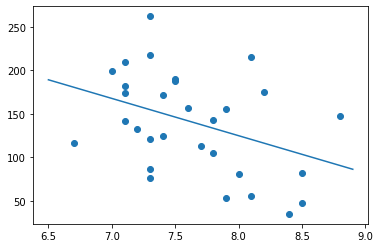

In [14]:

#Plotting the graph
plt.scatter(np.array(xtrain, xtest), np.array(ytrain, ytest))
x = np.array([i/10 for i in range(65, 90)])
y = (m * (x - xmin) / (xmax - xmin) +c) * (ymax - ymin) + ymin
plt.plot(x, y)
plt.show()